<a href="https://colab.research.google.com/github/PrithaSarkar/SubReddit_Classification/blob/main/Subreddit_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

In [ ]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-21 12:08:12--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-21 12:08:13--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K   633KB/s    in 0.7s    

2022-03-21 12:08:14 (633 KB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  in

In [ ]:
import json
import pandas as pd
import gzip
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


First things first, let's normalise the data and prepare it for our analysis.

In [ ]:
train_datadf=pd.json_normalize(train_data)
validation_datadf=pd.json_normalize(validation_data)
test_datadf=pd.json_normalize(test_data)

In [ ]:
train_datadf.head(3)

,subreddit,title,score,id,author,body
0,PS4,Can I get banned for having a game that I didn...,0,queqfu,XC-XERZ,"Long story short, I saw ESO in my library, dow..."
1,pcgaming,How to get a Kinect sensor to work with a PC?,0,1eujoa,ZachTheKing,I have seen a video online where someone took ...
2,NintendoSwitch,Switch Only Charges with GoPro Cable,5,m00bx7,BluePenguin2002,"Hi, hope this is the right place/way to post t..."


In [ ]:
validation_datadf.head(3)

,subreddit,title,score,id,author,body
0,Coffee,Reusable Nespresso Pods,3,j4d0i9,SaltyRob78,Hey there\nI want to go the reusable pod route...
1,HydroHomies,"Hydro News (sad) A city in US Michigan, Benton...",8,q6lb22,Kirinsdragon,I am not from the US and such news never reach...
2,Soda,Can’t find Sprite Zero Sugar Winter Spiced Cra...,2,rs0qmb,AnonymousPete23,Sprite released this limited edition soda for ...


In [ ]:
test_datadf.head(3)

,subreddit,title,score,id,author,body
0,Coffee,Best Indie Coffee Brands that have K-Cups?,0,3s7usq,GrandRapidsCreative,I know most aren't the biggest fan of K-Cups a...
1,NintendoSwitch,How do you decide when to keep playing or when...,125,r8luun,windlep7,I know the obvious answer is to give up if you...
2,xbox,"So I’m relatively new on Xbox, and have a ques...",1,qwzis0,GoblinGuide93,I was playing infinite with friends in the par...


As with any ML problem, it is absolutely necessary to look through the provided data in order to have a clear understanding of what is or isn't present in the dataset. How many classes are there? Is it a binary classification or multi-label classification problem? Are the class balanced? Does the data need normalisation? 

In [ ]:
print(train_datadf["subreddit"].unique())
print(validation_datadf["subreddit"].unique())
print(test_datadf["subreddit"].unique())

['PS4' 'pcgaming' 'NintendoSwitch' 'antiMLM' 'HydroHomies' 'Coffee' 'xbox'
 'Soda' 'tea']
['Coffee' 'HydroHomies' 'Soda' 'tea' 'PS4' 'pcgaming' 'xbox'
 'NintendoSwitch' 'antiMLM']
['Coffee' 'NintendoSwitch' 'xbox' 'tea' 'antiMLM' 'pcgaming' 'PS4'
 'HydroHomies' 'Soda']


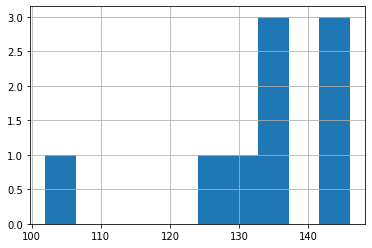

In [ ]:
train_datadf["subreddit"].value_counts()
train_datadf["subreddit"].value_counts().hist()

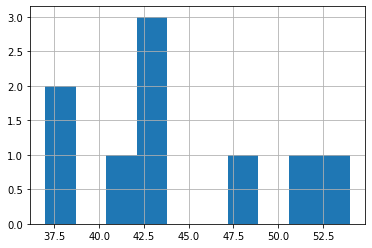

In [ ]:
validation_datadf["subreddit"].value_counts()
validation_datadf["subreddit"].value_counts().hist()

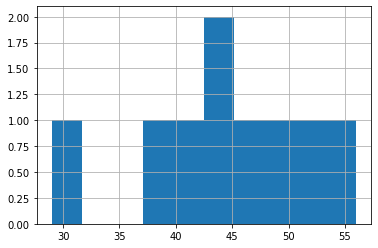

In [ ]:
test_datadf["subreddit"].value_counts()
test_datadf["subreddit"].value_counts().hist()

In [ ]:
print("Total number of posts in Training set ", len(train_datadf))
coffee_train = sum(train_datadf['subreddit'] == "Coffee")
nintendoswitch_train = sum(train_datadf['subreddit'] == "NintendoSwitch")
ps4_train = sum(train_datadf["subreddit"] == "PS4")
pcgaming_train = sum(train_datadf["subreddit"] == "pcgaming")
xbox_train = sum(train_datadf["subreddit"] == "xbox")
antiMLM_train = sum(train_datadf["subreddit"] == "antiMLM")
tea_train = sum(train_datadf["subreddit"] == "tea")
hydrohomies_train = sum(train_datadf["subreddit"] == "HydroHomies")
soda_train = sum(train_datadf["subreddit"] == "Soda")

print('Training set contains %0.0f%% posts from Coffee subreddit.' % (100*coffee_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from NintendoSwitch subreddit.' % (100*nintendoswitch_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from PS4 subreddit.' % (100*ps4_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from pcgaming subreddit.' % (100*pcgaming_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from xbox subreddit.' % (100*xbox_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from antiMLM subreddit.' % (100*antiMLM_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from tea subreddit.' % (100*tea_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from HydroHomies subreddit.' % (100*hydrohomies_train/len(train_datadf)))
print('Training set contains %0.0f%% posts from Soda subreddit.' % (100*soda_train/len(train_datadf)))

Total number of posts in Training set  1200
Training set contains 11% posts from Coffee subreddit.
Training set contains 12% posts from NintendoSwitch subreddit.
Training set contains 12% posts from PS4 subreddit.
Training set contains 11% posts from pcgaming subreddit.
Training set contains 11% posts from xbox subreddit.
Training set contains 11% posts from antiMLM subreddit.
Training set contains 12% posts from tea subreddit.
Training set contains 11% posts from HydroHomies subreddit.
Training set contains 8% posts from Soda subreddit.


In [ ]:
print("Total number of posts in Training set ", len(validation_datadf))
coffee_val = sum(validation_datadf['subreddit'] == "Coffee")
nintendoswitch_val = sum(validation_datadf['subreddit'] == "NintendoSwitch")
ps4_val = sum(validation_datadf["subreddit"] == "PS4")
pcgaming_val = sum(validation_datadf["subreddit"] == "pcgaming")
xbox_val = sum(validation_datadf["subreddit"] == "xbox")
antiMLM_val = sum(validation_datadf["subreddit"] == "antiMLM")
tea_val = sum(validation_datadf["subreddit"] == "tea")
hydrohomies_val = sum(validation_datadf["subreddit"] == "HydroHomies")
soda_val = sum(validation_datadf["subreddit"] == "Soda")

print('Validation set contains %0.0f%% posts from Coffee subreddit.' % (100*coffee_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from NintendoSwitch subreddit.' % (100*nintendoswitch_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from PS4 subreddit.' % (100*ps4_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from pcgaming subreddit.' % (100*pcgaming_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from xbox subreddit.' % (100*xbox_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from antiMLM subreddit.' % (100*antiMLM_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from tea subreddit.' % (100*tea_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from HydroHomies subreddit.' % (100*hydrohomies_val/len(validation_datadf)))
print('Validation set contains %0.0f%% posts from Soda subreddit.' % (100*soda_val/len(validation_datadf)))

Total number of posts in Training set  400
Validation set contains 10% posts from Coffee subreddit.
Validation set contains 13% posts from NintendoSwitch subreddit.
Validation set contains 11% posts from PS4 subreddit.
Validation set contains 11% posts from pcgaming subreddit.
Validation set contains 9% posts from xbox subreddit.
Validation set contains 14% posts from antiMLM subreddit.
Validation set contains 12% posts from tea subreddit.
Validation set contains 10% posts from HydroHomies subreddit.
Validation set contains 11% posts from Soda subreddit.


In [ ]:
print("Total number of posts in Training set ", len(test_datadf))
coffee_test = sum(test_datadf['subreddit'] == "Coffee")
nintendoswitch_test = sum(test_datadf['subreddit'] == "NintendoSwitch")
ps4_test = sum(test_datadf["subreddit"] == "PS4")
pcgaming_test = sum(test_datadf["subreddit"] == "pcgaming")
xbox_test = sum(test_datadf["subreddit"] == "xbox")
antiMLM_test = sum(test_datadf["subreddit"] == "antiMLM")
tea_test = sum(test_datadf["subreddit"] == "tea")
hydrohomies_test = sum(test_datadf["subreddit"] == "HydroHomies")
soda_test = sum(test_datadf["subreddit"] == "Soda")

print('Test set contains %0.0f%% posts from Coffee subreddit.' % (100*coffee_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from NintendoSwitch subreddit.' % (100*nintendoswitch_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from PS4 subreddit.' % (100*ps4_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from pcgaming subreddit.' % (100*pcgaming_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from xbox subreddit.' % (100*xbox_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from antiMLM subreddit.' % (100*antiMLM_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from tea subreddit.' % (100*tea_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from HydroHomies subreddit.' % (100*hydrohomies_test/len(test_datadf)))
print('Test set contains %0.0f%% posts from Soda subreddit.' % (100*soda_test/len(test_datadf)))

Total number of posts in Training set  400
Test set contains 14% posts from Coffee subreddit.
Test set contains 13% posts from NintendoSwitch subreddit.
Test set contains 12% posts from PS4 subreddit.
Test set contains 12% posts from pcgaming subreddit.
Test set contains 11% posts from xbox subreddit.
Test set contains 11% posts from antiMLM subreddit.
Test set contains 10% posts from tea subreddit.
Test set contains 10% posts from HydroHomies subreddit.
Test set contains 7% posts from Soda subreddit.


Now that we know there are 9 classes and it is a multi label classification problem, it is time to manually annotate the classifiers.

In [ ]:
#manually annotate the classifiers
train_datadf["Label"] = ""
validation_datadf["Label"] = ""
test_datadf["Label"] = ""

def Labelling(x):
  if x=="Coffee":
    return 1
  elif x=="NintendoSwitch":
    return 2
  elif x=="xbox":
    return 3
  elif x=="tea":
    return 4
  elif x=="antiMLM":
    return 5
  elif x=="pcgaming":
    return 6
  elif x=="PS4":
    return 7
  elif x=="HydroHomies":
    return 8
  elif x=="Soda":
    return 9

for i, row in train_datadf.iterrows():
  train_datadf.loc[i, "Label"] = Labelling(train_datadf["subreddit"][i])

for i, row in validation_datadf.iterrows():
  validation_datadf.loc[i, "Label"] = Labelling(validation_datadf["subreddit"][i])

for i, row in test_datadf.iterrows():
  test_datadf.loc[i, "Label"] = Labelling(test_datadf["subreddit"][i])

Let's start working on our problem now by importing the necessary packages.

In [ ]:
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#tokenizing the body
selected_columns = ["subreddit", "body", "Label"]
token_train = train_datadf[selected_columns].copy()
token_val = validation_datadf[selected_columns].copy()
token_test = test_datadf[selected_columns].copy()

def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

Creation of vocabulary is going to prove helpful while working on the classification problem. 

In [ ]:
#creating vocabulary to determine max_features
mini_tokenized=[]
for i, row in train_datadf.iterrows():
  mini_tokenized.append(text_pipeline_spacy(train_datadf["body"][i]))

def make_vocabulary(corpus):
  unique_tokens = sorted(set( t for token_list in corpus for t in token_list ))
  token_to_id = { v:i for i,v in enumerate(unique_tokens)}
  return token_to_id

vocab = make_vocabulary(mini_tokenized)

In [ ]:
#checking the most common words of the vocabulary to find the max_features to consider
import collections
wordcount = {}

for word in vocab:
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in wordcount:
      wordcount[word] = 1
    else:
      wordcount[word] += 1

word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(len(vocab)):
  if count>1:
    if count>2:
      if count>3:
        print(word, ": ", count)

Some further analysis revealed that only few words get repeated in the vocabulary. This means that there are barely any words that "represent" the dataset and thus we cannot set a number on the max feature parameter and would have to consider the entire length of the vocabulary as the max feature later on.

In [ ]:
max_features = len(vocab)
print(max_features)

7043


The two commonly used vectorizers - One-hot vectoriser and TF-IDF vectoriser has been employed on the 'body' column of the dataset.

In [ ]:
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = CountVectorizer(tokenizer=text_pipeline_spacy)

train_features_ohv = one_hot_vectorizer.fit_transform(token_train['body'].tolist())
validation_features_ohv = one_hot_vectorizer.transform(token_val['body'].tolist())
test_features_ohv = one_hot_vectorizer.transform(token_test['body'].tolist())

In [ ]:
#Create Tf-IDF vectorizer.
tf_idf_vectorizer = TfidfVectorizer(tokenizer=text_pipeline_spacy)

train_features_tfidf = tf_idf_vectorizer.fit_transform(token_train['body'].tolist())
validation_features_tfidf = tf_idf_vectorizer.transform(token_val['body'].tolist())
test_features_tfidf = tf_idf_vectorizer.transform(token_test['body'].tolist())

In [ ]:
#creating the labels for comparison of predicted values
train_labels = train_datadf['Label'].copy()
train_labels = train_labels.astype('int')

validation_labels = validation_datadf['Label'].copy()
validation_labels = validation_labels.astype('int')

test_labels = test_datadf['Label'].copy()
test_labels = test_labels.astype('int')

Our baseline model would be DummyClassifier.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

In [ ]:
target_names = ['Coffee', 'NintendoSwitch', 'xbox', 
                'tea', 'antiMLM', 'pcgaming', 
                'PS4', 'HydroHomies', 'Soda' ]

In [ ]:
#Pretty Confusion Matrix
def evaluation_summary(description, true_labels, predictions, target_classes):
  print("Evaluation for: " + description)
  report = classification_report(true_labels, predictions,  digits=3, zero_division=0, target_names=target_classes)
  cm = confusion_matrix(true_labels, predictions)
  plt.figure(figsize=(12,12))
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax)
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title("Confusion Matrix")
  ax.xaxis.set_ticklabels(target_names) 
  ax.yaxis.set_ticklabels(target_names)
  return report

Evaluation for: Dummy Classifier with strategy = 'stratified' on the Validation Data
                precision    recall  f1-score   support

        Coffee      0.158     0.214     0.182        42
NintendoSwitch      0.120     0.115     0.118        52
          xbox      0.070     0.081     0.075        37
           tea      0.130     0.125     0.128        48
       antiMLM      0.156     0.130     0.141        54
      pcgaming      0.152     0.116     0.132        43
           PS4      0.132     0.163     0.146        43
   HydroHomies      0.143     0.184     0.161        38
          Soda      0.125     0.070     0.090        43

      accuracy                          0.133       400
     macro avg      0.132     0.133     0.130       400
  weighted avg      0.133     0.133     0.130       400



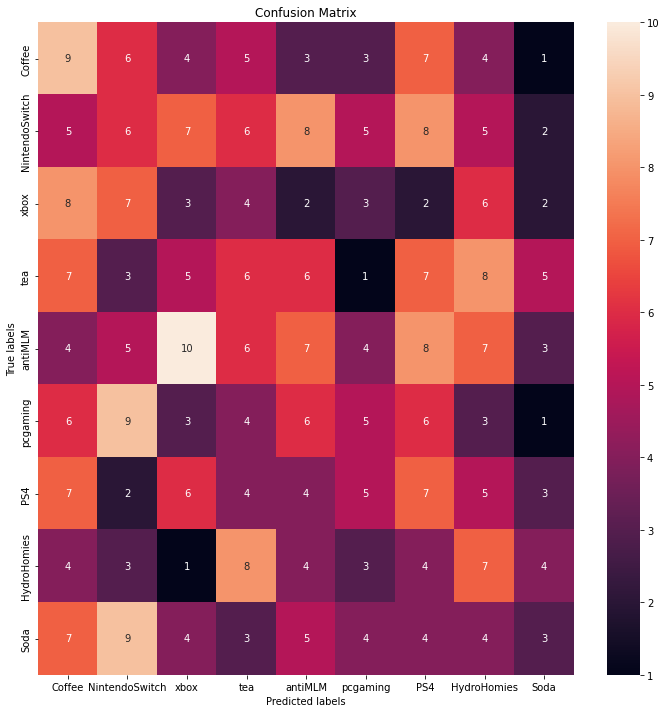

In [ ]:
#Dummy Classifier with strategy="stratified"
dmstrat = DummyClassifier(strategy = "stratified")

dmstrat.fit(train_datadf["body"], train_labels)
val_pred = dmstrat.predict(validation_datadf["body"])
print(evaluation_summary("Dummy Classifier with strategy = 'stratified' on the Validation Data", validation_labels,val_pred , target_names))

Evaluation for: Dummy Classifier with strategy= 'stratified' on Test Data
                precision    recall  f1-score   support

        Coffee      0.111     0.089     0.099        56
NintendoSwitch      0.087     0.077     0.082        52
          xbox      0.019     0.023     0.020        44
           tea      0.143     0.143     0.143        42
       antiMLM      0.043     0.045     0.044        44
      pcgaming      0.054     0.043     0.048        47
           PS4      0.140     0.146     0.143        48
   HydroHomies      0.077     0.079     0.078        38
          Soda      0.098     0.138     0.114        29

      accuracy                          0.085       400
     macro avg      0.086     0.087     0.086       400
  weighted avg      0.086     0.085     0.085       400



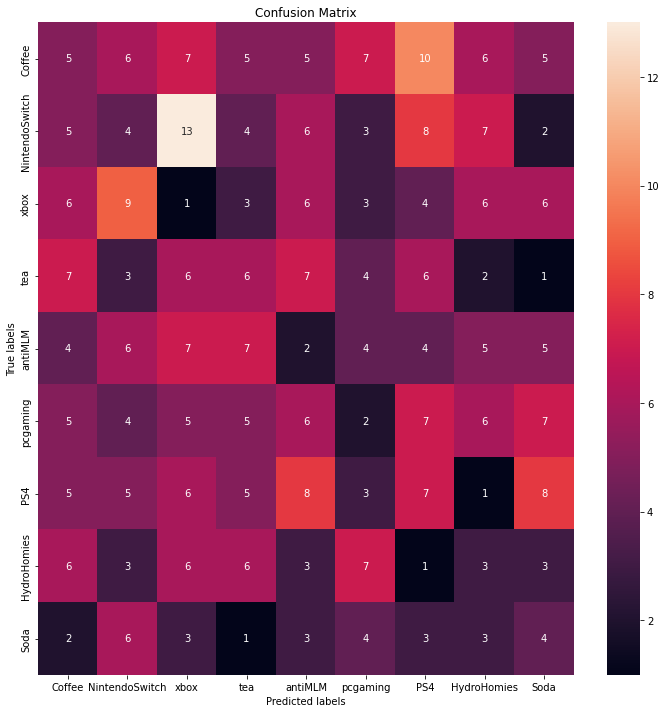

In [ ]:
pred_dummystrat = dmstrat.predict(test_datadf["body"])
reportdummystrat = evaluation_summary("Dummy Classifier with strategy= 'stratified' on Test Data", test_labels, pred_dummystrat, target_names)
print(reportdummystrat)

Evaluation for: Dummy Classifier with startegy = 'most_frequent' on the Validation Data
                precision    recall  f1-score   support

        Coffee      0.000     0.000     0.000        42
NintendoSwitch      0.000     0.000     0.000        52
          xbox      0.000     0.000     0.000        37
           tea      0.120     1.000     0.214        48
       antiMLM      0.000     0.000     0.000        54
      pcgaming      0.000     0.000     0.000        43
           PS4      0.000     0.000     0.000        43
   HydroHomies      0.000     0.000     0.000        38
          Soda      0.000     0.000     0.000        43

      accuracy                          0.120       400
     macro avg      0.013     0.111     0.024       400
  weighted avg      0.014     0.120     0.026       400



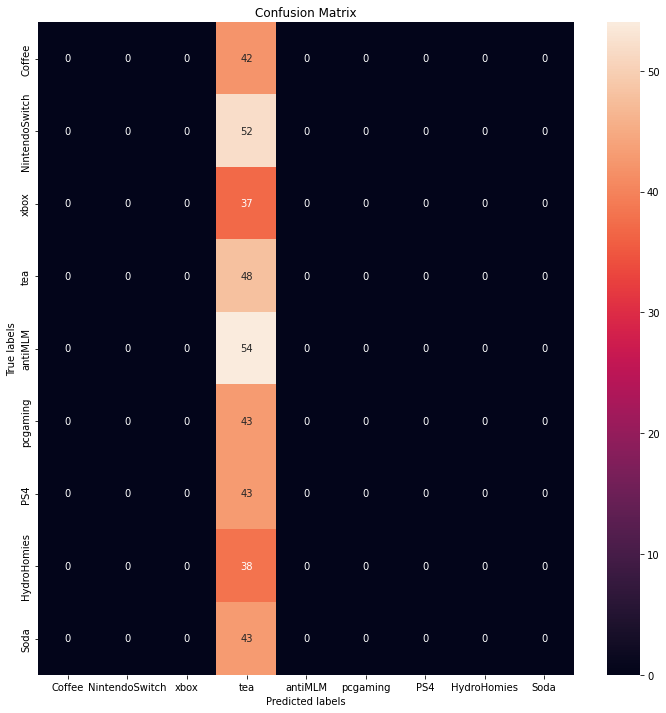

In [ ]:
#Dummy Classifier with strategy="most_frequent"
dmmf = DummyClassifier(strategy = "most_frequent")

dmmf.fit(train_datadf["body"], train_labels)
print(evaluation_summary("Dummy Classifier with startegy = 'most_frequent' on the Validation Data", validation_labels, dmmf.predict(validation_datadf["body"]), target_names))

Evaluation for: Dummy Classifier with strategy= 'most_frequent' on the Test Data
                precision    recall  f1-score   support

        Coffee      0.000     0.000     0.000        56
NintendoSwitch      0.000     0.000     0.000        52
          xbox      0.000     0.000     0.000        44
           tea      0.105     1.000     0.190        42
       antiMLM      0.000     0.000     0.000        44
      pcgaming      0.000     0.000     0.000        47
           PS4      0.000     0.000     0.000        48
   HydroHomies      0.000     0.000     0.000        38
          Soda      0.000     0.000     0.000        29

      accuracy                          0.105       400
     macro avg      0.012     0.111     0.021       400
  weighted avg      0.011     0.105     0.020       400



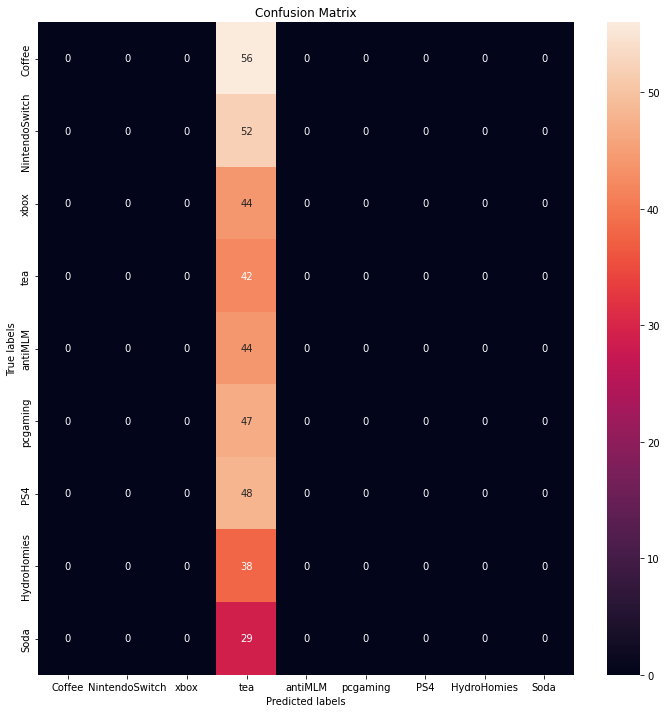

In [ ]:
pred_dummymf = dmmf.predict(test_datadf["body"])
reportdummymf = evaluation_summary("Dummy Classifier with strategy= 'most_frequent' on the Test Data", test_labels, pred_dummymf, target_names)
print(reportdummymf)

The next classifier to apply is the Logistic Regression Classifier. However, we would use both One-hot vectorised and TF-IDF vectorised data with it one after the other to see which one results in a better accuracy score. 

While doing so, we should also be mindful of not overfitting or underfitting our models. Checking the accuracy scores on the validation datasets could help us determing the model performance in an intuitive manner. 

Evaluation for: Logistic Regression with One-hot Vectorization on Validation Dataset
                precision    recall  f1-score   support

        Coffee      0.860     0.881     0.871        42
NintendoSwitch      0.833     0.673     0.745        52
          xbox      0.725     0.784     0.753        37
           tea      0.975     0.812     0.886        48
       antiMLM      0.938     0.833     0.882        54
      pcgaming      0.525     0.488     0.506        43
           PS4      0.453     0.558     0.500        43
   HydroHomies      0.733     0.868     0.795        38
          Soda      0.755     0.860     0.804        43

      accuracy                          0.750       400
     macro avg      0.755     0.751     0.749       400
  weighted avg      0.765     0.750     0.754       400



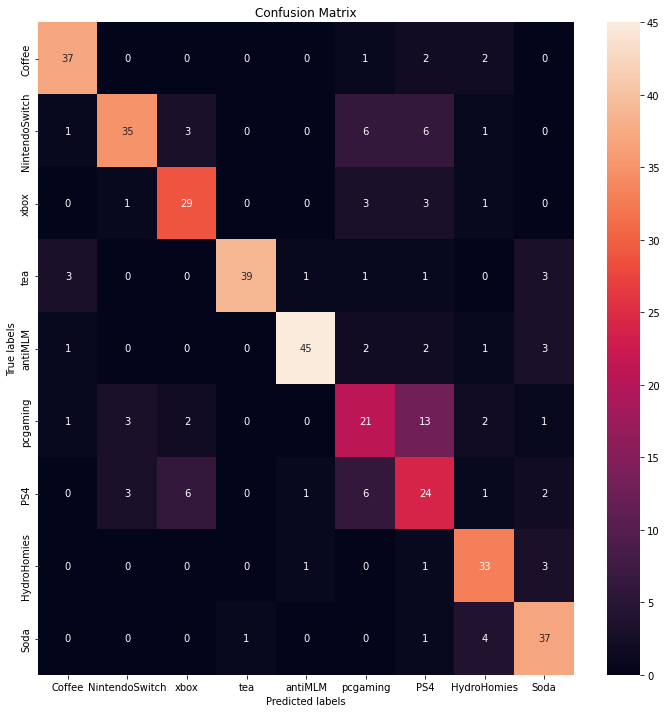

In [ ]:
#Logistic Regression with one-hot vectorization and TF-IDF vectorization
logreg = LogisticRegression()
logreg.fit(train_features_ohv, train_labels)
print(evaluation_summary("Logistic Regression with One-hot Vectorization on Validation Dataset", validation_labels, logreg.predict(validation_features_ohv), target_names))

Evaluation for: Logistic Regression with One-hot Vectorization on Test Dataset
                precision    recall  f1-score   support

        Coffee      0.887     0.839     0.862        56
NintendoSwitch      0.830     0.750     0.788        52
          xbox      0.756     0.705     0.729        44
           tea      0.927     0.905     0.916        42
       antiMLM      0.886     0.705     0.785        44
      pcgaming      0.641     0.532     0.581        47
           PS4      0.567     0.708     0.630        48
   HydroHomies      0.706     0.947     0.809        38
          Soda      0.697     0.793     0.742        29

      accuracy                          0.760       400
     macro avg      0.766     0.765     0.760       400
  weighted avg      0.771     0.760     0.760       400



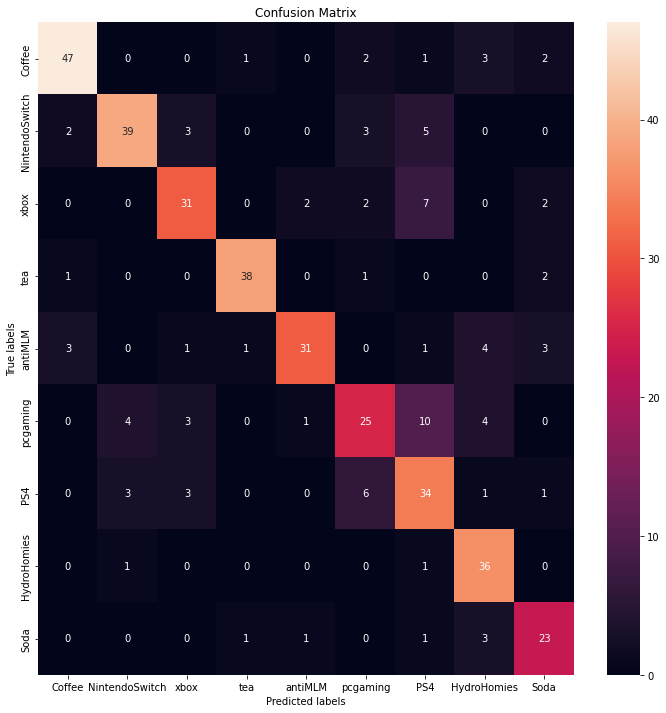

In [ ]:
y_pred_ohv = logreg.predict(test_features_ohv)
reportlrohv = evaluation_summary("Logistic Regression with One-hot Vectorization on Test Dataset", test_labels, y_pred_ohv, target_names)
print(reportlrohv)

Evaluation for: Logistic Regression with TF-IDF Vectorization on Validation Dataset
                precision    recall  f1-score   support

        Coffee      0.909     0.952     0.930        42
NintendoSwitch      0.651     0.788     0.713        52
          xbox      0.839     0.703     0.765        37
           tea      0.976     0.833     0.899        48
       antiMLM      0.758     0.926     0.833        54
      pcgaming      0.513     0.465     0.488        43
           PS4      0.500     0.512     0.506        43
   HydroHomies      0.886     0.816     0.849        38
          Soda      0.946     0.814     0.875        43

      accuracy                          0.762       400
     macro avg      0.775     0.757     0.762       400
  weighted avg      0.772     0.762     0.763       400



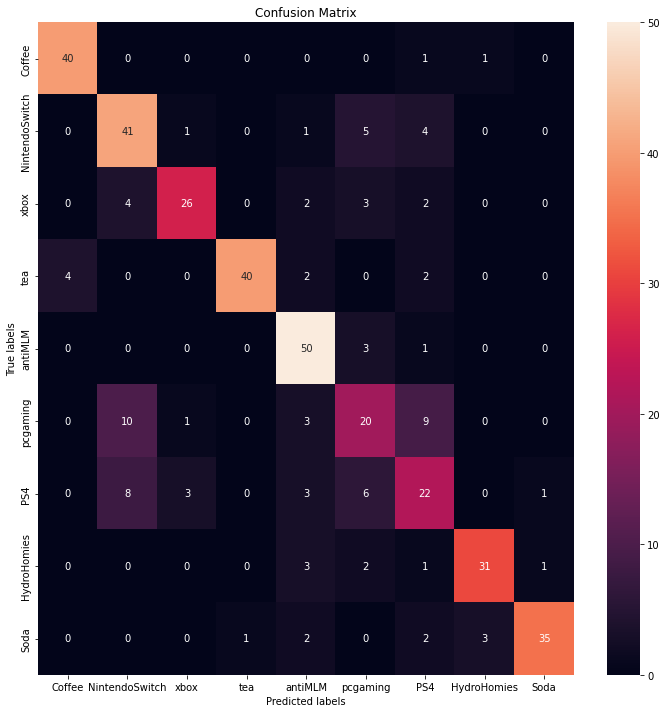

In [ ]:
#TF-IDF vectorization
logreg.fit(train_features_tfidf, train_labels)
print(evaluation_summary("Logistic Regression with TF-IDF Vectorization on Validation Dataset", validation_labels, logreg.predict(validation_features_tfidf), target_names))

Evaluation for: Logistic Regression with TF-IDF Vectorization on Test Dataset
                precision    recall  f1-score   support

        Coffee      0.963     0.929     0.945        56
NintendoSwitch      0.778     0.808     0.792        52
          xbox      0.816     0.705     0.756        44
           tea      0.929     0.929     0.929        42
       antiMLM      0.698     0.841     0.763        44
      pcgaming      0.628     0.574     0.600        47
           PS4      0.611     0.688     0.647        48
   HydroHomies      0.943     0.868     0.904        38
          Soda      0.926     0.862     0.893        29

      accuracy                          0.797       400
     macro avg      0.810     0.800     0.803       400
  weighted avg      0.804     0.797     0.799       400



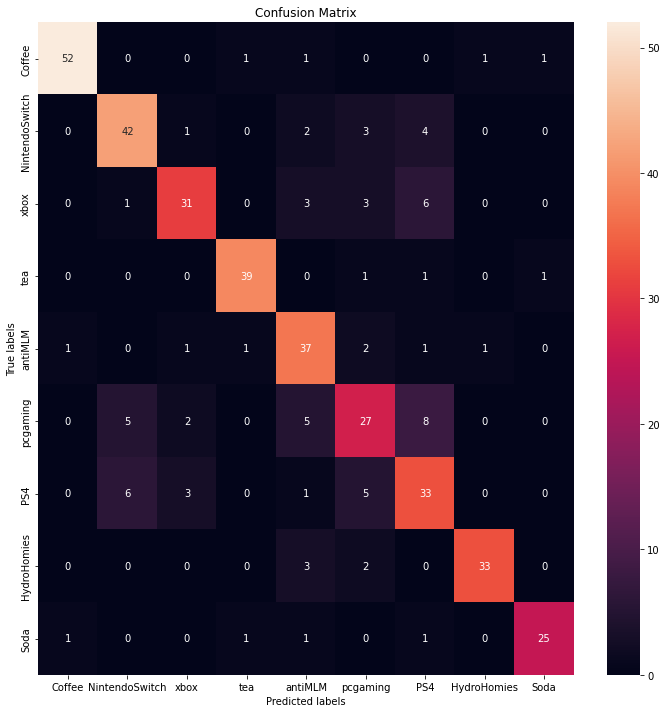

In [ ]:
y_pred_tfidf = logreg.predict(test_features_tfidf)
reportlrtfidf = evaluation_summary("Logistic Regression with TF-IDF Vectorization on Test Dataset", test_labels, y_pred_tfidf, target_names)
print(reportlrtfidf)

Let's see if the accuracy score improves through the usage of Support Vectore Machines.

Evaluation for: SVC with RBF on Validation Dataset
                precision    recall  f1-score   support

        Coffee      0.870     0.952     0.909        42
NintendoSwitch      0.564     0.846     0.677        52
          xbox      0.771     0.730     0.750        37
           tea      0.953     0.854     0.901        48
       antiMLM      0.761     0.944     0.843        54
      pcgaming      0.654     0.395     0.493        43
           PS4      0.600     0.419     0.493        43
   HydroHomies      0.886     0.816     0.849        38
          Soda      0.925     0.860     0.892        43

      accuracy                          0.765       400
     macro avg      0.776     0.757     0.756       400
  weighted avg      0.772     0.765     0.757       400



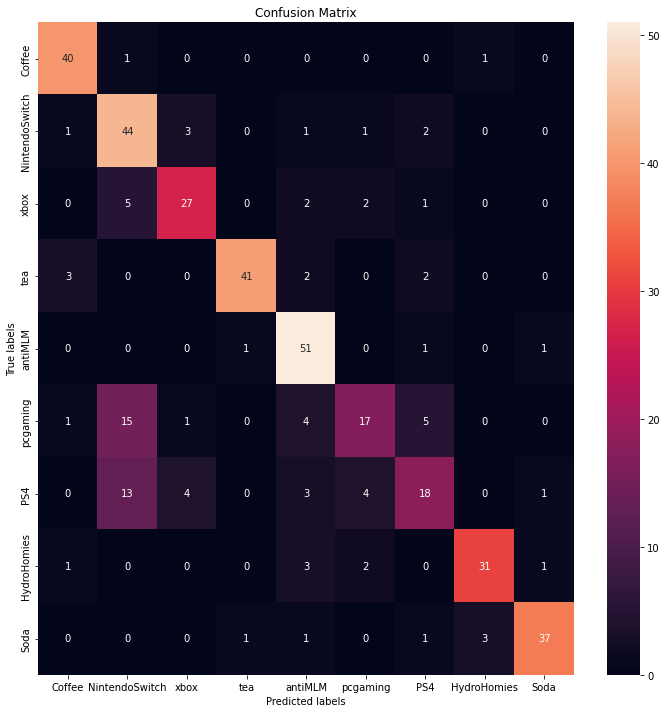

In [ ]:
#SVM classifier with one-hot vectorization and RBF kernel
svc = SVC(kernel='rbf')

svc.fit(train_features_ohv, train_labels)
print(evaluation_summary("SVC with RBF on Validation Dataset", validation_labels, logreg.predict(validation_features_ohv), target_names))

Evaluation for: SVC with RBF on Test Dataset
                precision    recall  f1-score   support

        Coffee      0.933     0.750     0.832        56
NintendoSwitch      0.654     0.654     0.654        52
          xbox      0.846     0.500     0.629        44
           tea      0.970     0.762     0.853        42
       antiMLM      0.592     0.659     0.624        44
      pcgaming      0.933     0.298     0.452        47
           PS4      0.330     0.792     0.466        48
   HydroHomies      0.912     0.816     0.861        38
          Soda      0.742     0.793     0.767        29

      accuracy                          0.662       400
     macro avg      0.768     0.669     0.682       400
  weighted avg      0.765     0.662     0.675       400



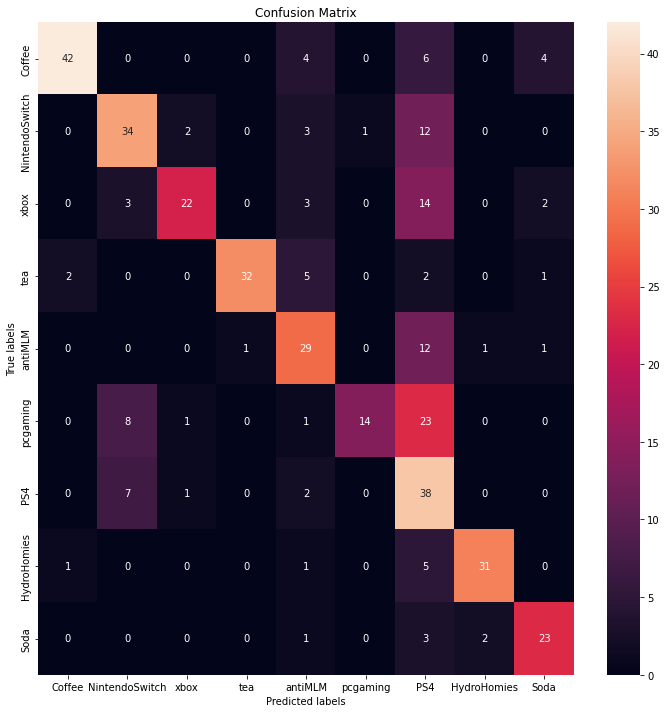

In [ ]:
y_pred_svc = svc.predict(test_features_ohv)
reportsvmohv = evaluation_summary("SVC with RBF on Test Dataset", test_labels, y_pred_svc, target_names)
print(reportsvmohv)

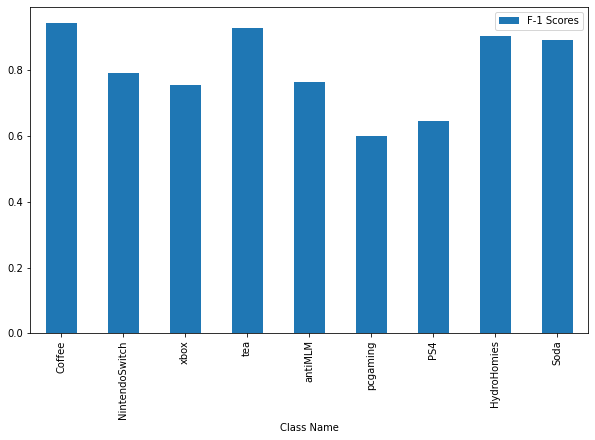

In [ ]:
def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

report_df = report_to_df(reportlrtfidf)

scores = []
for i, row in report_df.iterrows():
  scores.append(float(report_df["f1-score"][i]))

data = {'Class Name': target_names, 'F-1 Scores': scores}  
  
# Create DataFrame  
graph = pd.DataFrame(data)  
graph.plot.bar(x="Class Name", y="F-1 Scores", figsize=(10,6))

Does Gradient Boosting help?

Evaluation for: GradientBoosting Classifier with TF-IDF Vectorization on Validation Dataset
                precision    recall  f1-score   support

        Coffee      0.909     0.952     0.930        42
NintendoSwitch      0.651     0.788     0.713        52
          xbox      0.839     0.703     0.765        37
           tea      0.976     0.833     0.899        48
       antiMLM      0.758     0.926     0.833        54
      pcgaming      0.513     0.465     0.488        43
           PS4      0.500     0.512     0.506        43
   HydroHomies      0.886     0.816     0.849        38
          Soda      0.946     0.814     0.875        43

      accuracy                          0.762       400
     macro avg      0.775     0.757     0.762       400
  weighted avg      0.772     0.762     0.763       400



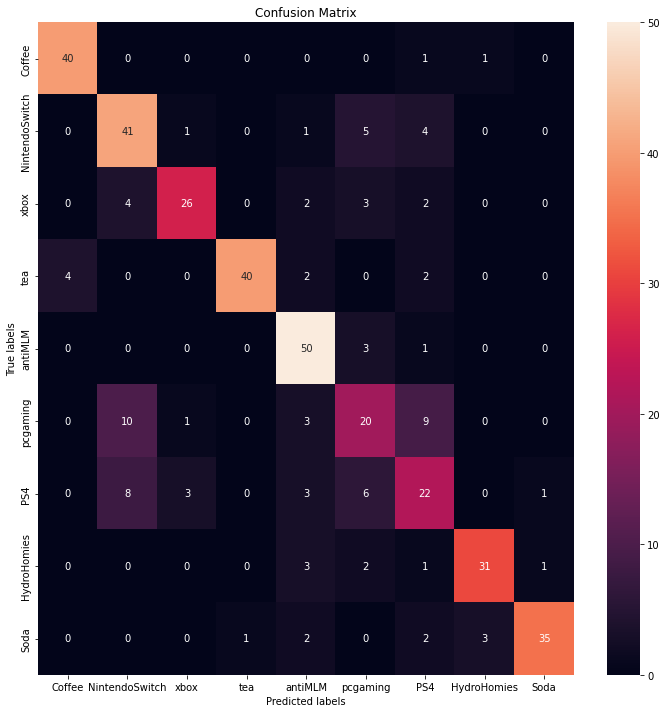

In [ ]:
#GradientBoosting Classifer
from sklearn.ensemble import GradientBoostingClassifier

gradientb_c = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=8)
gradientb_c.fit(train_features_tfidf, train_labels)
print(evaluation_summary("GradientBoosting Classifier with TF-IDF Vectorization on Validation Dataset", validation_labels, logreg.predict(validation_features_tfidf), target_names))

Evaluation for: GradientBoosting Classifier with TF-IDF Vectorization on Test Dataset
                precision    recall  f1-score   support

        Coffee      0.855     0.839     0.847        56
NintendoSwitch      0.733     0.635     0.680        52
          xbox      0.711     0.614     0.659        44
           tea      0.925     0.881     0.902        42
       antiMLM      0.844     0.614     0.711        44
      pcgaming      0.426     0.489     0.455        47
           PS4      0.382     0.604     0.468        48
   HydroHomies      0.795     0.816     0.805        38
          Soda      0.857     0.621     0.720        29

      accuracy                          0.680       400
     macro avg      0.725     0.679     0.694       400
  weighted avg      0.717     0.680     0.691       400



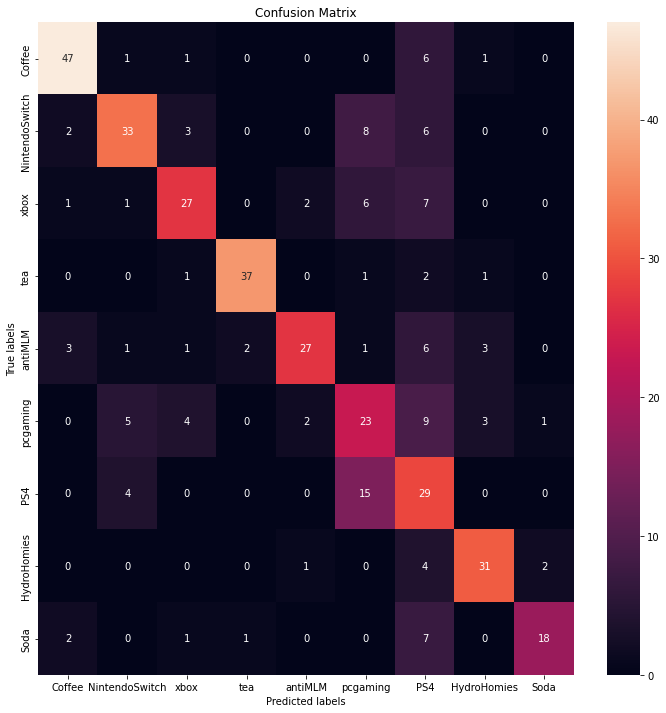

In [ ]:
y_pred_gbc = gradientb_c.predict(test_features_tfidf)
report_gbc = evaluation_summary("GradientBoosting Classifier with TF-IDF Vectorization on Test Dataset", test_labels, y_pred_gbc, target_names)
print(report_gbc)
report_df_gbc = report_to_df(report_gbc)

So after fitting all these classifiers, the best accuracy score is provided by Logistic Regression with TF-IDF vectoriser. Let's run with that then.

Now, it is time to tune the model to increase the scores. Let's see how far we can go without overfitting.

In [ ]:
from itertools import filterfalse
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=text_pipeline_spacy)),
    ('classify', LogisticRegression())
])

params = {
    'vectorizer__sublinear_tf': [True, False],
    'classify__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'vectorizer__max_features': [0, 1800, max_features]
}

grid_search = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params, verbose=1, scoring='f1_macro')

grid_search.fit(token_train['body'], train_labels)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", lin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(tokenizer=<function text_pipeline_spacy at 0x7fbacdf26830>)),
                                       ('classify', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classify__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                         10000, 100000],
                         'vectorizer__max_features': [0, 1800, 7043],
                         'vectorizer__sublinear_tf': [True, False]},
             scoring='f1_macro', verbose=1)

In [ ]:
best_estimator = grid_search.best_estimator_
best_estimator

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=7043, sublinear_tf=True,
                                 tokenizer=<function text_pipeline_spacy at 0x7fbacdf26830>)),
                ('classify', LogisticRegression(C=1))])

Now that we know what the best estimators will be, let's fit our model with it.

In [ ]:
from sklearn.pipeline import Pipeline

tfidf_logreg_pipeline = Pipeline([
                        ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy, sublinear_tf = True, max_features = max_features)),
                        ('Logistic Regression', LogisticRegression(penalty = 'l2', C = 1))
                        ])

Evaluation for: Tuned Logistic Regression with TF-IDF Vectorization on Validation Dataset
                precision    recall  f1-score   support

        Coffee      0.909     0.952     0.930        42
NintendoSwitch      0.672     0.827     0.741        52
          xbox      0.862     0.676     0.758        37
           tea      0.976     0.854     0.911        48
       antiMLM      0.833     0.926     0.877        54
      pcgaming      0.556     0.465     0.506        43
           PS4      0.500     0.558     0.527        43
   HydroHomies      0.846     0.868     0.857        38
          Soda      0.947     0.837     0.889        43

      accuracy                          0.780       400
     macro avg      0.789     0.774     0.777       400
  weighted avg      0.788     0.780     0.780       400



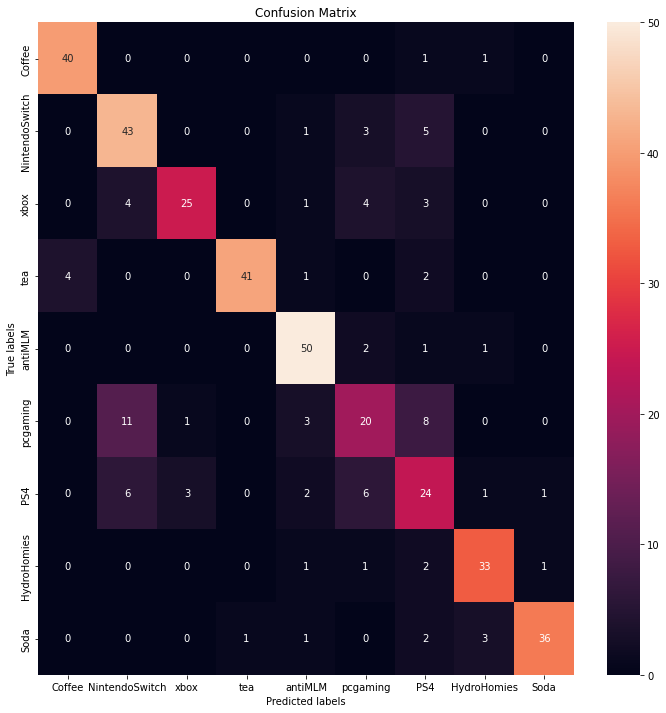

In [ ]:
tfidf_logreg_pipeline.fit(token_train['body'], train_labels)
valid_features_tfidf_tune = tfidf_logreg_pipeline.predict(token_val['body'])
print(evaluation_summary("Tuned Logistic Regression with TF-IDF Vectorization on Validation Dataset", validation_labels, valid_features_tfidf_tune, target_names))

Evaluation for: Tuned Logistic Regression with TF-IDF Vectorization on Test Dataset
                precision    recall  f1-score   support

        Coffee      0.964     0.946     0.955        56
NintendoSwitch      0.768     0.827     0.796        52
          xbox      0.838     0.705     0.765        44
           tea      0.929     0.929     0.929        42
       antiMLM      0.750     0.818     0.783        44
      pcgaming      0.610     0.532     0.568        47
           PS4      0.596     0.708     0.648        48
   HydroHomies      0.944     0.895     0.919        38
          Soda      0.929     0.897     0.912        29

      accuracy                          0.802       400
     macro avg      0.814     0.806     0.808       400
  weighted avg      0.807     0.802     0.803       400



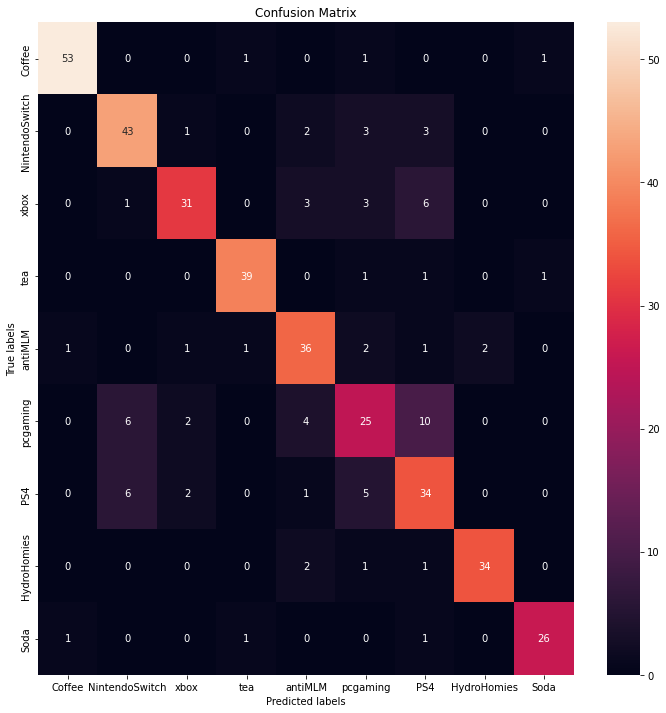

In [ ]:
test_pred_tfidf_tune = tfidf_logreg_pipeline.predict(token_test['body'])
report = evaluation_summary("Tuned Logistic Regression with TF-IDF Vectorization on Test Dataset", test_labels, test_pred_tfidf_tune , target_names)
print(report)

Such an improvement!! Let's do some digging and see which classes are getting misclassified the most or what exactly the error is.

In [ ]:
comparison = pd.DataFrame(columns=["Predicted Labels", "Actual Labels"])
comparison["Predicted Labels"] = test_pred_tfidf_tune
comparison["Actual Labels"] = test_labels
comparison.T

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Predicted Labels,1,2,7,7,5,4,5,1,7,1,...,5,5,3,3,4,6,2,2,6,9
Actual Labels,1,2,3,4,5,4,5,1,6,1,...,8,5,3,3,4,6,2,2,6,9


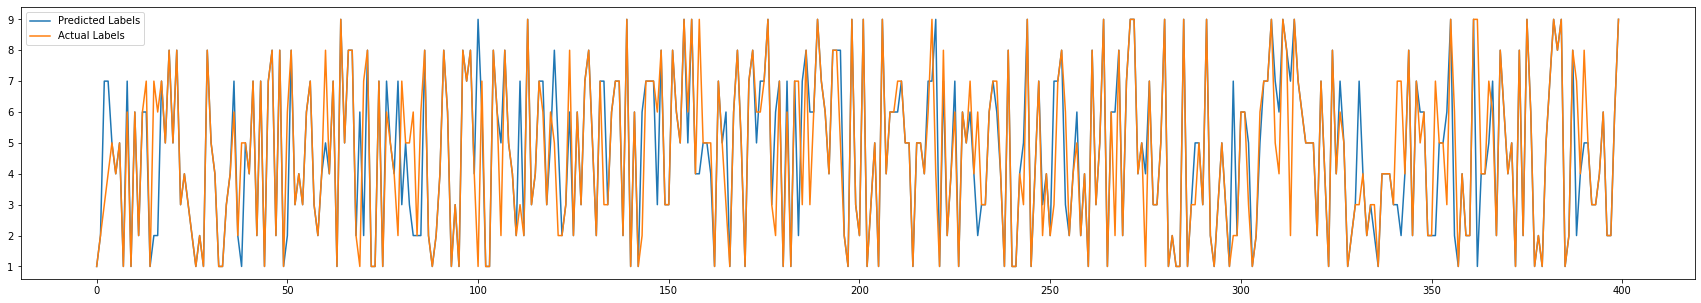

In [ ]:
comparison.plot.line(figsize=(30,5))

In [ ]:
label1 = comparison.loc[comparison['Actual Labels'] == 1]
count=0
for i, row in label1.iterrows():
  if label1["Actual Labels"][i] != label1["Predicted Labels"][i]:
    count+=1
print(target_names[0]," was misclassified ", count," times.")

Coffee  was misclassified  3  times.


In [ ]:
label2 = comparison.loc[comparison['Actual Labels'] == 2]
count=0
for i, row in label2.iterrows():
  if label2["Actual Labels"][i] != label2["Predicted Labels"][i]:
    count+=1
print(target_names[1]," was misclassified ", count," times.")

NintendoSwitch  was misclassified  9  times.


In [ ]:
label3 = comparison.loc[comparison['Actual Labels'] == 3]
count=0
for i, row in label3.iterrows():
  if label3["Actual Labels"][i] != label3["Predicted Labels"][i]:
    count+=1
print(target_names[2]," was misclassified ", count," times.")

xbox  was misclassified  13  times.


In [ ]:
label4 = comparison.loc[comparison['Actual Labels'] == 4]
count=0
for i, row in label4.iterrows():
  if label4["Actual Labels"][i] != label4["Predicted Labels"][i]:
    count+=1
print(target_names[3]," was misclassified ", count," times.")

tea  was misclassified  3  times.


In [ ]:
label5 = comparison.loc[comparison['Actual Labels'] == 5]
count=0
for i, row in label5.iterrows():
  if label5["Actual Labels"][i] != label5["Predicted Labels"][i]:
    count+=1
print(target_names[4]," was misclassified ", count," times.")

antiMLM  was misclassified  8  times.


In [ ]:
label6 = comparison.loc[comparison['Actual Labels'] == 6]
count=0
for i, row in label6.iterrows():
  if label6["Actual Labels"][i] != label6["Predicted Labels"][i]:
    count+=1
print(target_names[5]," was misclassified ", count," times.")

pcgaming  was misclassified  22  times.


In [ ]:
label7 = comparison.loc[comparison['Actual Labels'] == 7]
count=0
for i, row in label7.iterrows():
  if label7["Actual Labels"][i] != label7["Predicted Labels"][i]:
    count+=1
print(target_names[6]," was misclassified ", count," times.")

PS4  was misclassified  14  times.


In [ ]:
label8 = comparison.loc[comparison['Actual Labels'] == 8]
count=0
for i, row in label8.iterrows():
  if label8["Actual Labels"][i] != label8["Predicted Labels"][i]:
    count+=1
print(target_names[7]," was misclassified ", count," times.")

HydroHomies  was misclassified  4  times.


In [ ]:
label9 = comparison.loc[comparison['Actual Labels'] == 9]
count=0
for i, row in label9.iterrows():
  if label9["Actual Labels"][i] != label9["Predicted Labels"][i]:
    count+=1
print(target_names[8]," was misclassified ", count," times.")

Soda  was misclassified  3  times.


In [ ]:
!pip install eli5 
!pip install TextExplainer

ERROR: Could not find a version that satisfies the requirement TextExplainer (from versions: none)
ERROR: No matching distribution found for TextExplainer


In [ ]:
import eli5
from eli5.lime import TextExplainer

In [ ]:
eli5.show_weights(best_estimator.steps[1][1], vec=best_estimator.steps[0][1], top=10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
te = TextExplainer(random_state=42) 

te.fit(test_datadf['body'].tolist()[0], best_estimator.predict_proba) 
te.show_prediction(target_names = target_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


I think, we can further increase the scores by adding some more features.

Let's add the following features:

For TF-IDF model:- "title" column along with the "body" column of the dataset.

Reason: The mandatory "title" field of any Reddit post is quite descriptive of the actual post and thus considering that would be helpful for the model.

For Logistic Regression:- solver = "saga". 

Reason: For multiclass classification, "saga" handles the multinomial loss. 

In [ ]:
selected_columns = ["subreddit", "title", "body", "Label"]
train = train_datadf[selected_columns].copy()
val = validation_datadf[selected_columns].copy()
test = test_datadf[selected_columns].copy()

In [ ]:
tfidf_logreg_new_pipeline = Pipeline([
                            ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy, sublinear_tf = True, max_features = max_features)),
                            ('Logistic Regression', LogisticRegression(penalty = 'l2', C = 1, solver="saga"))
                            ])

Evaluation for: Tuned Logistic Regression with Feature Engineering on Validation Dataset
                precision    recall  f1-score   support

        Coffee      0.932     0.976     0.953        42
NintendoSwitch      0.719     0.885     0.793        52
          xbox      0.879     0.784     0.829        37
           tea      0.978     0.917     0.946        48
       antiMLM      0.945     0.963     0.954        54
      pcgaming      0.730     0.628     0.675        43
           PS4      0.705     0.721     0.713        43
   HydroHomies      0.921     0.921     0.921        38
          Soda      0.975     0.907     0.940        43

      accuracy                          0.860       400
     macro avg      0.865     0.856     0.858       400
  weighted avg      0.864     0.860     0.860       400



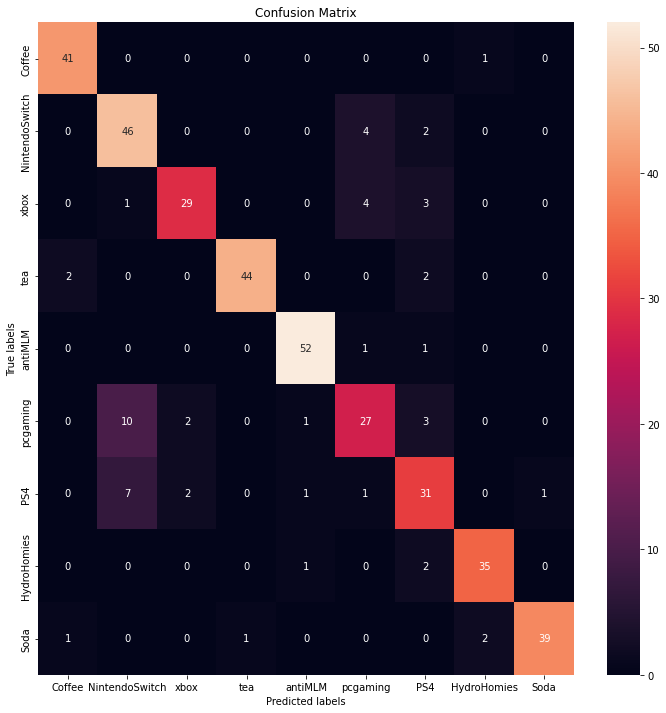

In [ ]:
tfidf_logreg_new_pipeline.fit(train['title']+train['body'],train_labels)
print(evaluation_summary("Tuned Logistic Regression with Feature Engineering on Validation Dataset", validation_labels, tfidf_logreg_new_pipeline.predict(val['title']+val['body']), target_names))

Evaluation for: Tuned Logistic Regression with Feature Engineering on Test Dataset
                precision    recall  f1-score   support

        Coffee      0.981     0.946     0.964        56
NintendoSwitch      0.807     0.885     0.844        52
          xbox      0.947     0.818     0.878        44
           tea      0.976     0.952     0.964        42
       antiMLM      0.833     0.909     0.870        44
      pcgaming      0.811     0.638     0.714        47
           PS4      0.702     0.833     0.762        48
   HydroHomies      0.895     0.895     0.895        38
          Soda      0.933     0.966     0.949        29

      accuracy                          0.868       400
     macro avg      0.876     0.871     0.871       400
  weighted avg      0.873     0.868     0.867       400



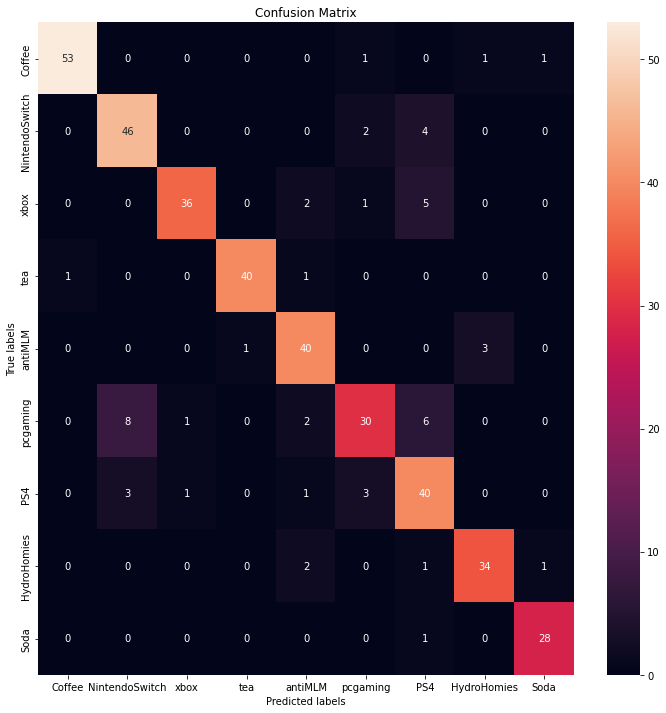

In [ ]:
test_pred = tfidf_logreg_new_pipeline.predict(test['title']+test['body'])
report_new_model=evaluation_summary("Tuned Logistic Regression with Feature Engineering on Test Dataset", test_labels, test_pred, target_names)
print(report_new_model)